<a href="https://colab.research.google.com/github/XinyanZhang027/ML/blob/main/Customer%20purchase%20forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Student number: C21018467

#1.Load and Explore The Data

##1.1 Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
import xgboost as xgb




##1.2 Load Dataset

In [ ]:
ecommerce = pd.read_csv('https://raw.githubusercontent.com/XinyanZhang027/ML/main/Coursework_1_data.csv')
warnings.filterwarnings('ignore')

## 1.3 Summaize The Dataset

In [ ]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)
print(ecommerce.shape)
print(ecommerce.head(20))
print(ecommerce.info())
print(ecommerce.describe())
print(ecommerce.columns)

(12330, 18)
    Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0                0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False    False
1                0                      0.0              0                     0.0               2                64.000000     0.000000   0.100000         0.0         0.0   Feb                 2        2       1            2  Returning_Visitor    False    False
2                0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                 4    

## 1.4 Data Visualization

### 1.4.1 Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31d7009e10>,
      dtype=object)

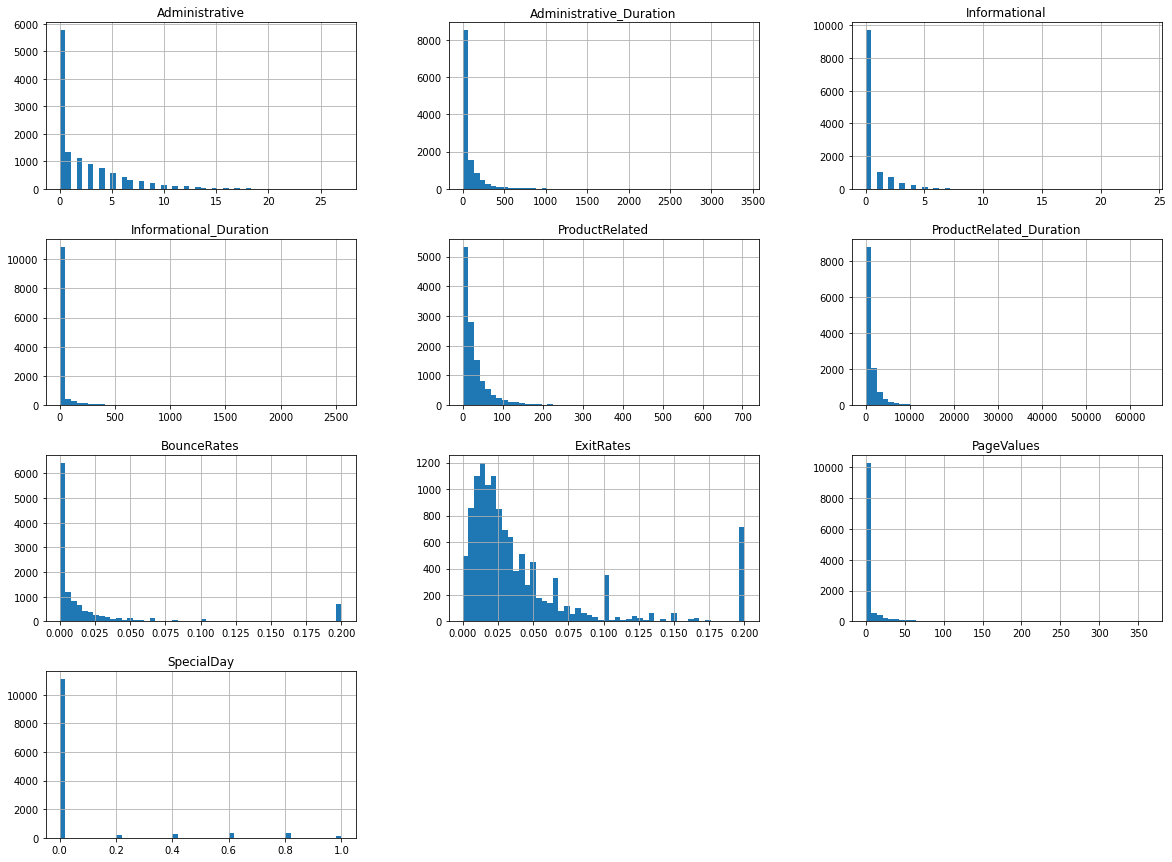

In [ ]:
ecommerce[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']].hist(bins=50, figsize=(20,15))

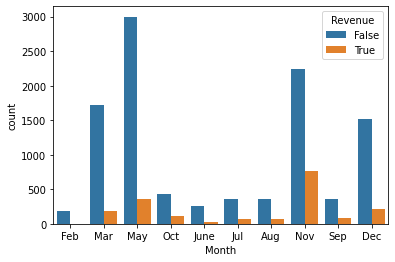

In [ ]:
sns.countplot(x='Month', hue='Revenue', data=ecommerce)

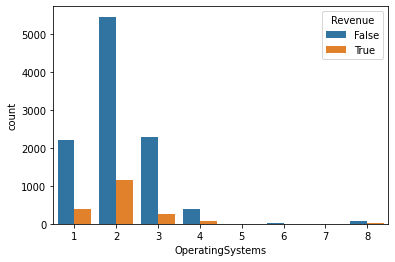

In [ ]:
sns.countplot(x='OperatingSystems', hue='Revenue', data=ecommerce)

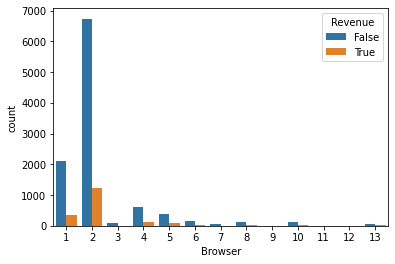

In [ ]:
sns.countplot(x='Browser', hue='Revenue', data=ecommerce)

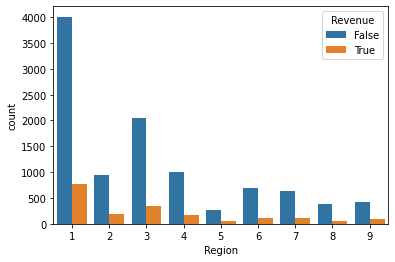

In [ ]:
sns.countplot(x='Region', hue='Revenue', data=ecommerce)


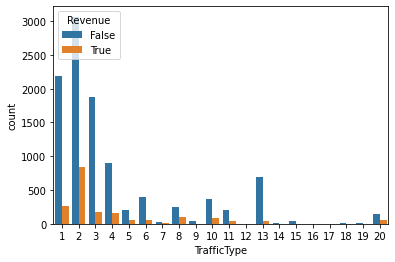

In [ ]:
sns.countplot(x='TrafficType', hue='Revenue', data=ecommerce)


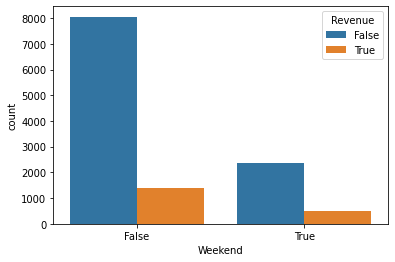

In [ ]:
sns.countplot(x='Weekend', hue='Revenue', data=ecommerce)

### 1.4.2 Box Plot

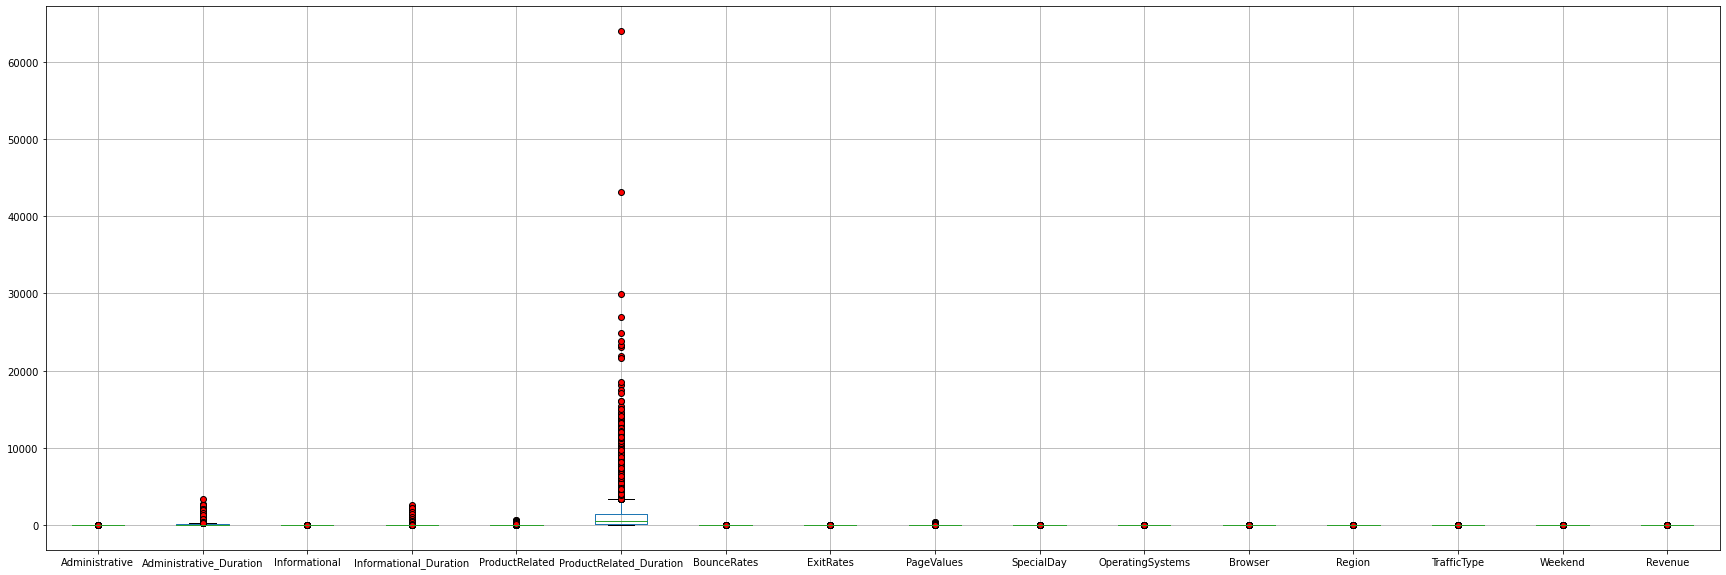

In [ ]:
ecommerce.boxplot(figsize=(30,10),flierprops = {'marker':'o','markerfacecolor':'red','color':'red'})


### 1.4.3 Scatter plot and Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31d1f93e90>,
      dtype=object)

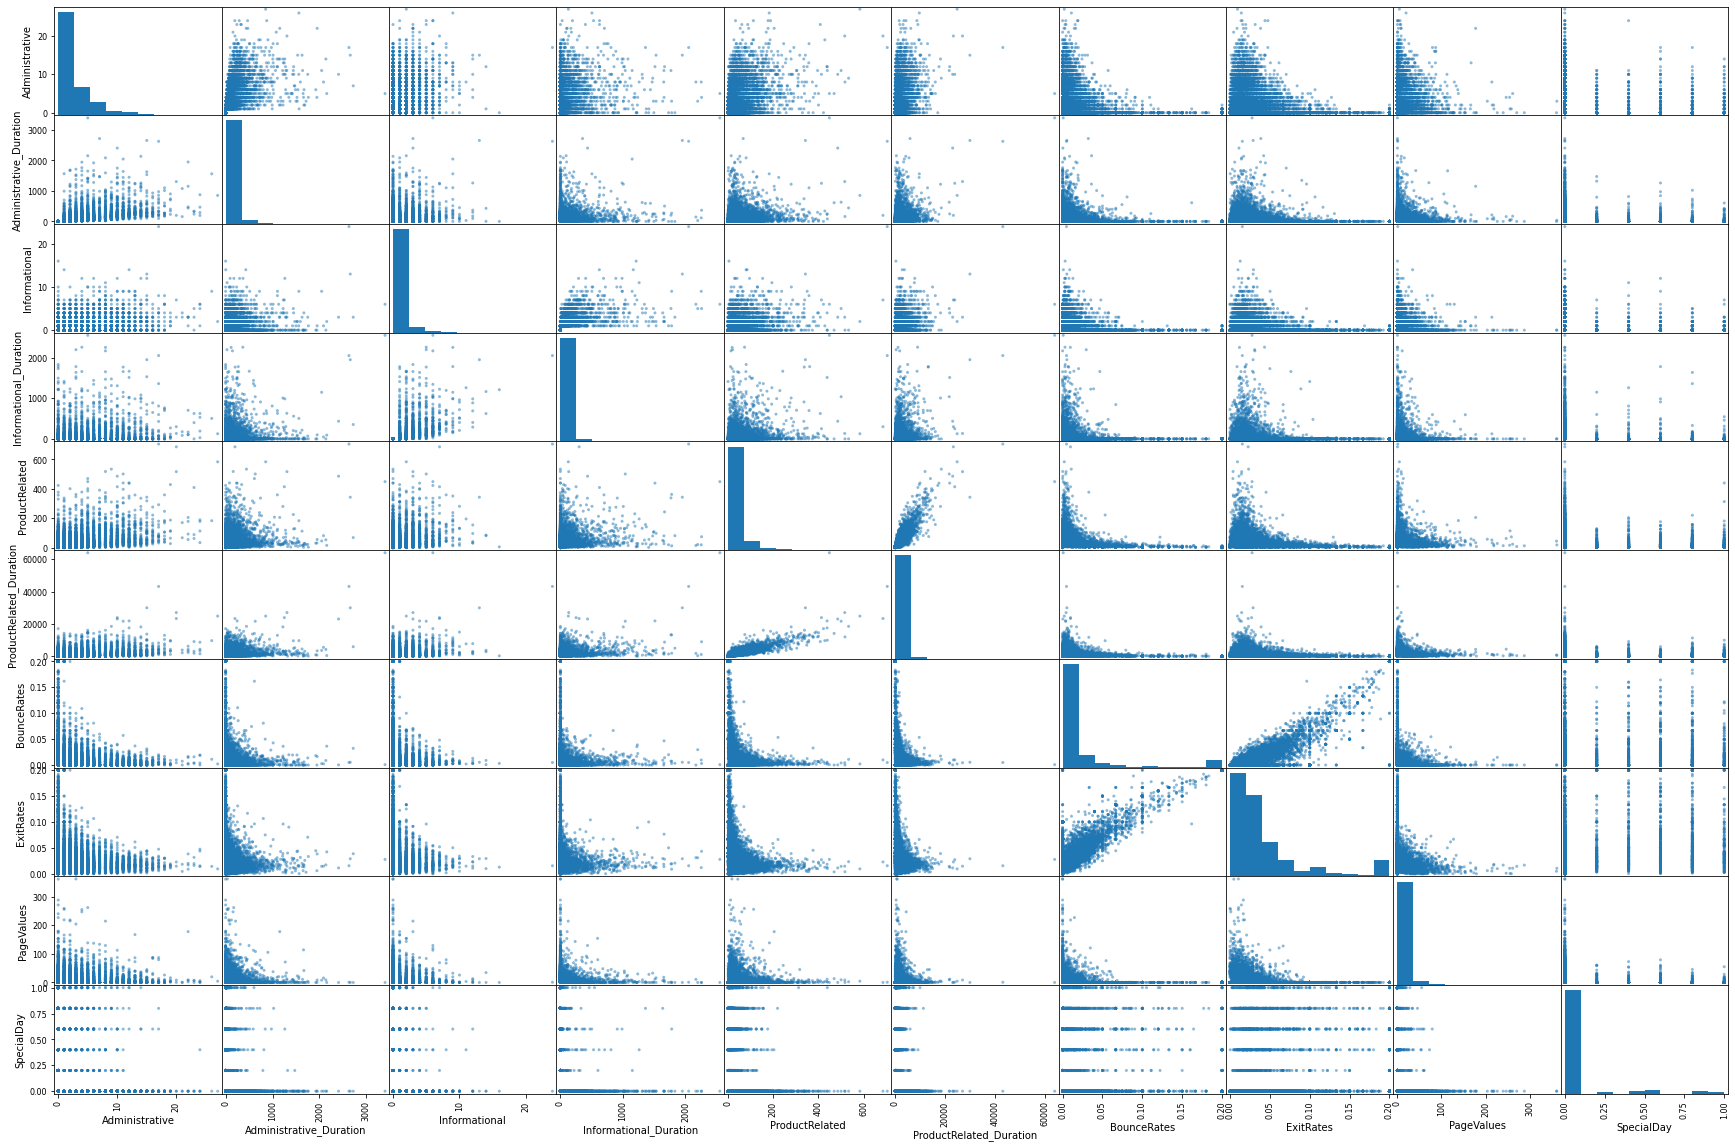

In [ ]:
scatter_matrix(ecommerce[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']], figsize=(30, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31bff7c090>,
      dtype=object)

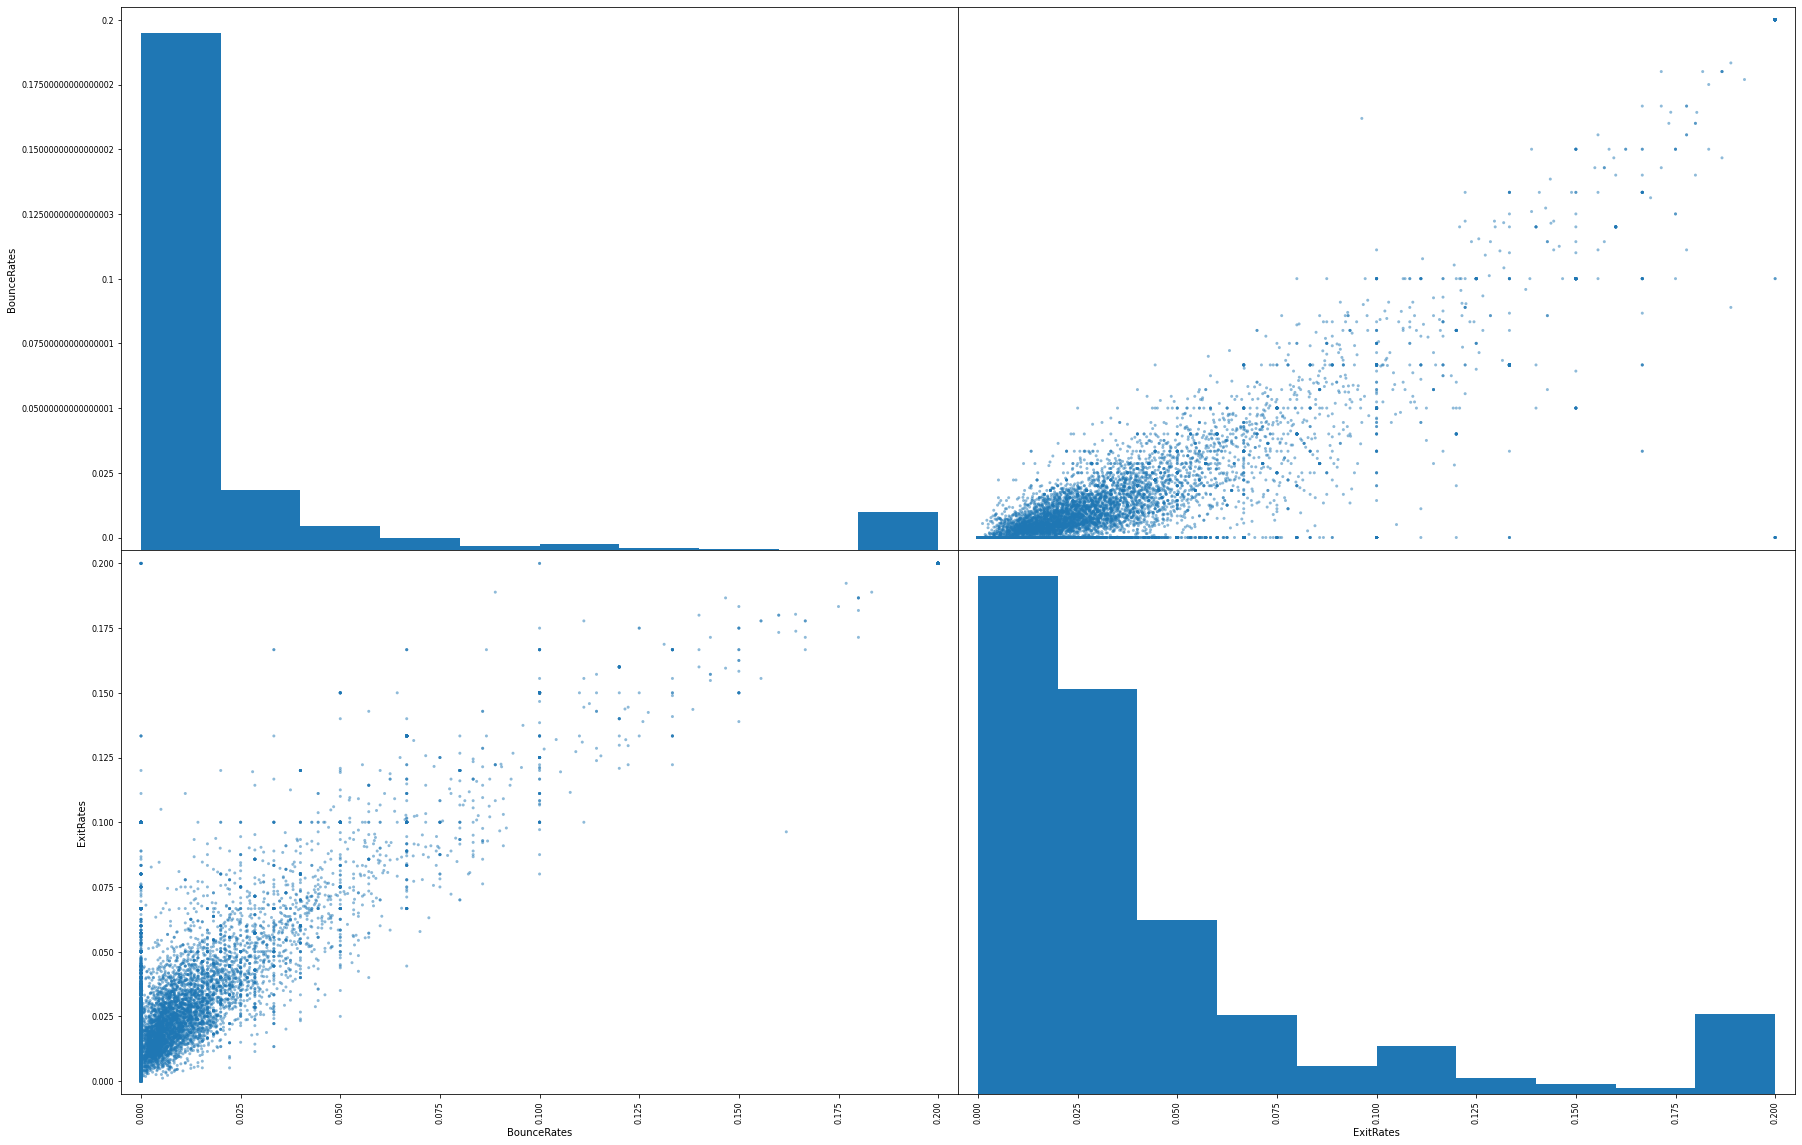

In [ ]:
scatter_matrix(ecommerce[['BounceRates', 'ExitRates']], figsize=(30, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31bfccc9d0>,
      dtype=object)

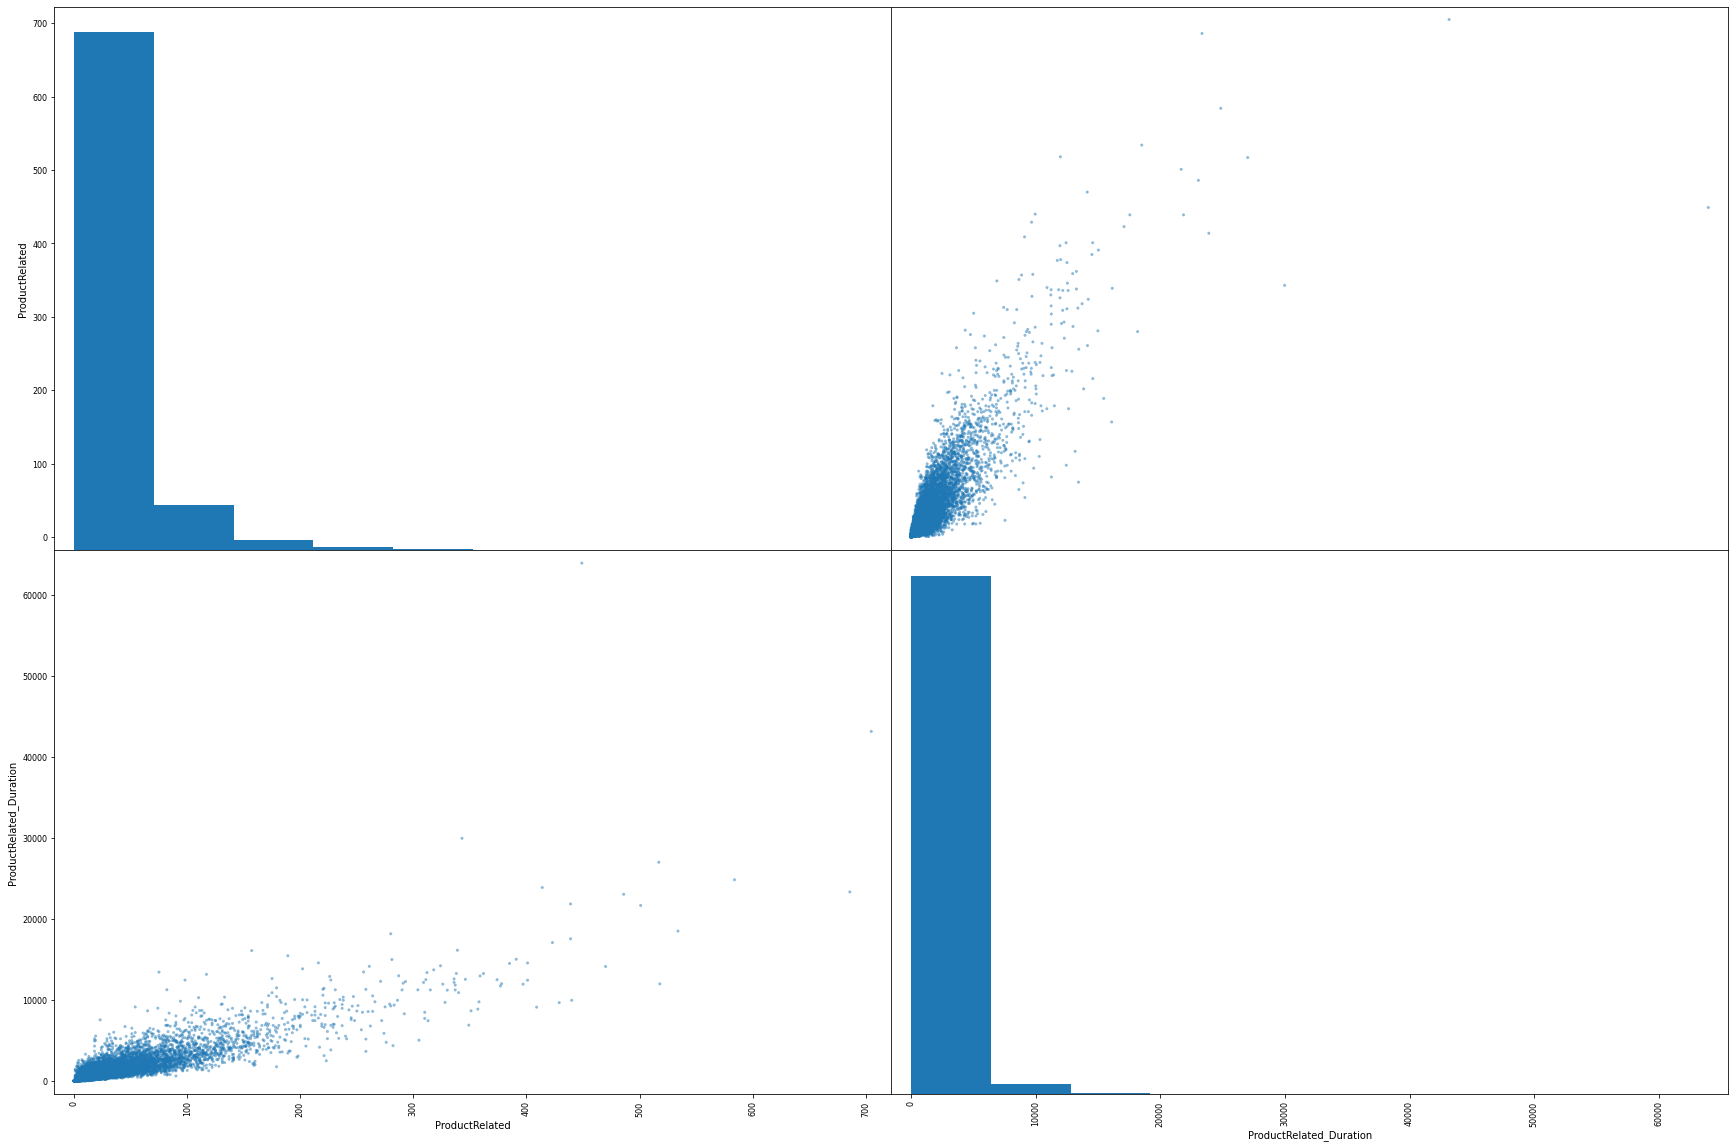

In [ ]:
scatter_matrix(ecommerce[['ProductRelated', 'ProductRelated_Duration']], figsize=(30, 20))

In [ ]:
corr_matrix = ecommerce.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  TrafficType   Weekend   Revenue
Administrative                 1.000000                 0.601583       0.376850                0.255848        0.431119                 0.373939    -0.223563  -0.316483    0.098990   -0.094778         -0.006347 -0.025035 -0.005487    -0.033561  0.026417  0.138917
Administrative_Duration        0.601583                 1.000000       0.302710                0.238031        0.289087                 0.355422    -0.144170  -0.205798    0.067608   -0.073304         -0.007343 -0.015392 -0.005561    -0.014376  0.014990  0.093587
Informational                  0.376850                 0.302710       1.000000                0.618955        0.374164                 0.387505    -0.116114  -0.163666    0.048632   -0.048219         -0.0095

# 2.Pre-processing

## 2.1 Split the train set and test set


In [ ]:
ecommerce_x=ecommerce[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month' ,'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
ecommerce_y=ecommerce[['Revenue']]
X_train, X_test, y_train, y_test = train_test_split(ecommerce_x, ecommerce_y, test_size=0.3, stratify=ecommerce_y)

## 2.2 Feature Selection

In [ ]:
X_train=X_train[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
        'ExitRates', 'PageValues', 'SpecialDay', 'Month' ,'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]


## 2.3 Scaler

In [ ]:

standard_scale = StandardScaler()   # to default 0 mean and 1 standard deviation
X_train=X_train.copy()
y_train=y_train.copy()
X_test=X_test.copy()
y_test=y_test.copy()

inlist = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',   'ExitRates', 'PageValues' ,'SpecialDay']

for item in inlist:
  X_train[item] = standard_scale.fit_transform(X_train[[item]])


for item in inlist:
  X_test[item] = standard_scale.fit_transform(X_test[[item]])


## 2.4 Encoding

In [ ]:

#categorical data
categorical_cols = ['Month' ,'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'] 
X_train1 = pd.get_dummies(X_train, columns = categorical_cols)
X_test1 = pd.get_dummies(X_test, columns = categorical_cols)



encoder= LabelEncoder().fit(y_train)
y_train['Revenue'] = encoder.transform(y_train['Revenue'])
encoder= LabelEncoder().fit(y_test)
y_test['Revenue'] = encoder.transform(y_test['Revenue'])

# Get missing columns in the training test
missing_cols = set( X_train1.columns ) - set( X_test1.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test1[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test1 = X_test1[X_train1.columns]


# 3.Model implement

## 3.1 Logistic Regression


In [ ]:
LG_clf = LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
LG_clf.fit(X_train1, y_train)
y_pred = LG_clf.predict(X_test1)
accuracy_score(y_test, y_pred)

0.8810489321438226

###3.1.1 Logistic Regression Optimization

In [ ]:
LG_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 1e-06,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_g={
        'class_weight':('','balanced'),
        'penalty':('l1','l2'),
        'multi_class':('auto','multinomial','ovr')
        }

gs = GridSearchCV(LG_clf,param_grid=param_g,cv=5)
gs.fit(X_train1, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8864557927698653
{'class_weight': '', 'multi_class': 'auto', 'penalty': 'l1'}


##3.2 KNN

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 20, weights='distance')
knn_clf.fit(X_train1, y_train)
y_pred = knn_clf.predict(X_test1)
accuracy_score(y_test, y_pred)

0.8767234387672344

###3.2.1 KNN Optimization

In [ ]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'distance'}

In [ ]:
param_g={
        'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
        'n_neighbors': (10,20,30,40,50,60,70,80,90,100),
        'weights': ('uniform','distance')
        }

gs = GridSearchCV(knn_clf,param_grid=param_g,cv=5)
gs.fit(X_train1, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8812426320164841
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}


## 3.3 SVM

In [ ]:
svm_clf =  SVC(kernel="poly", degree=3, coef0=1, C=0.1,gamma=0.1)
svm_clf.fit(X_train1, y_train)
y_pred = svm_clf.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8918626655852934

###3.3.1 SVM Optimization

In [ ]:
# define search space
parameters = {'kernel':('linear', 'rbf','poly'), 'gamma':[0.1, 1,10], 'C':[0.1,1,10]}   

# define classification model
model = SVC(kernel="rbf")

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=cv)


# execute search
result = search.fit(X_train1, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8976940881458524
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## 3.4 Decision Trees

In [ ]:
tree_clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, random_state=42, max_leaf_nodes=23, min_samples_split = 3)
tree_clf.fit(X_train1, y_train)

y_pred = tree_clf.predict(X_test1)
accuracy_score(y_test, y_pred)

0.7977831846444985

###Decision Trees Optimization

In [ ]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 11), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30))

# defie DT classification model
model = DecisionTreeClassifier(random_state=42)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train1, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8997025632698851
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 23, 'min_samples_split': 3}


##3.5 Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=81, random_state=42, max_features=10, oob_score=True) # random forest classifier
rnd_clf.fit(X_train1, y_train)

y_pred = rnd_clf.predict(X_test1)
accuracy_score(y_test, y_pred)

0.8983509056501757

###3.5.1 RF framework parameters Optimization

In [ ]:
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,
                        scoring='roc_auc',cv=10)
gsearch1.fit(X_train1,y_train)

print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

{'n_estimators': 81}
best accuracy:0.918703


###3.5.2 RF decision tree parameters Optimization

In [ ]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=81,
                        random_state=10),
                        param_grid = param_test2,scoring='roc_auc',cv=10)
gsearch1.fit(X_train1,y_train)
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

## 3.7 Adaboost

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

ada.fit(X_train1, y_train)
y_pred = ada.predict(X_test1)
accuracy_score(y_test, y_pred)

0.891051635577183

### 3.7.1 AdaBoost Optimization

In [ ]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 500,
 'random_state': None}

In [ ]:
param_g={
        'n_estimators':[10,50,100,200,300,400,500,600],
        'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]

}

gs = GridSearchCV(ada,param_grid=param_g,cv=5)
gs.fit(X_train1, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.894797104940214
{'learning_rate': 0.1, 'n_estimators': 50}


##3.6 Bagging

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=400, bootstrap=True, random_state=42)
bag_clf.fit(X_train1, y_train)
y_pred = bag_clf.predict(X_test1)
accuracy_score(y_test, y_pred)

0.9032170856988375

###3.6.1 Bagging Optimization

In [ ]:
bag_clf.get_params()

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 42,
 'base_estimator__sp

In [ ]:
param_g={
        'n_estimators':[400,500,600,700,800,900],
        'max_samples':[200,250,300,400,500]

}

gs = GridSearchCV(bag_clf,param_grid=param_g,cv=5)
gs.fit(X_train1, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9036034597400298
{'max_samples': 400, 'n_estimators': 500}


# 4.Model Evaluation

In [ ]:
models_=[]
models_.append(('Logistic',LG_clf))
models_.append(('KNN',knn_clf))
models_.append(('SVM',svm_clf))
models_.append(('Decision Tree',tree_clf))
models_.append(('Random Forest',rnd_clf))
models_.append(('Bagging',bag_clf))
models_.append(('AdaBoosting',ada))



In [ ]:
models_=[]
models_.append(('Logistic',LG_clf))
models_.append(('SVM',svm_clf))
models_.append(('Decision Tree',tree_clf))
models_.append(('AdaBoosting',ada))
models_.append(('Bagging',bag_clf))


In [ ]:
results_=[]
acc_score_=[]
auc_score_=[]
bias_=[]
f1_score_=[]
precision_score_=[]
recall_score_=[]
names_=[]
for name,model in models_:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X_train1,y_train,cv=kfold,scoring='roc_auc')
    results_.append(cv_results)
    bias_.append(np.var(cv_results,ddof=1))
    auc_score_.append(np.mean(cv_results))
    f1=model_selection.cross_val_score(model,X_train1,y_train,cv=kfold,scoring='f1_weighted')
    f1_score_.append(np.mean(f1))
    
    acc=model_selection.cross_val_score(model,X_train1,y_train,cv=kfold,scoring='accuracy')
    acc_score_.append(np.mean(acc))
    
    p=model_selection.cross_val_score(model,X_train1,y_train,cv=kfold,scoring='precision_weighted')
    precision_score_.append(np.mean(p))
    
    r=model_selection.cross_val_score(model,X_train1,y_train,cv=kfold,scoring='recall_weighted')
    recall_score_.append(np.mean(r))

    names_.append(name)

result_df=pd.DataFrame({'Model':names_,
                           'Accuracy Score':acc_score_,
                            'ROC-AUC Score':auc_score_,
                            'Variance Error':bias_,
                            'F1 Score':f1_score_,
                            'Precision Score':precision_score_,
                            'Recall Score':recall_score_})

In [ ]:
result_df

,Model,Accuracy Score,ROC-AUC Score,Variance Error,F1 Score,Precision Score,Recall Score
0,Logistic,0.884835,0.895768,0.000107,0.869280,0.874219,0.884835
1,SVM,0.892250,0.878628,0.000160,0.883834,0.883691,0.892250
2,Decision Tree,0.896189,0.905272,0.000111,0.893188,0.891803,0.896189
3,AdaBoosting,0.895726,0.918810,0.000083,0.891370,0.889956,0.895726
4,Bagging,0.900359,0.927933,0.000099,0.896837,0.895532,0.900359
